In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

In [21]:
def compose_circuit(function: QuantumCircuit):
    """
    Compose a new circuit with the oracle and a circuit
    """
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.h(range(n + 1))
    
    qc.barrier()
    
    qc.compose(function, inplace=True)

    qc.barrier()

    qc.h(range(n))

    qc.measure(range(n), range(n))

    return qc

In [4]:
def dj_algorithm(function: QuantumCircuit):
    """
    Finds if an the oracle is constant or balanced
    """
    qc = compose_circuit(function)

    display(qc.draw(output='mpl'))

    result = AerSimulator().run(qc, shots=500, memory=True).result()
    measurements = result.get_memory()
    
    print(measurements)

    if "1" in measurements[0]:
        return "Balanced oracle"
    else:        
        return "Constant oracle"

In [5]:
def constant_oracle():
    qc = QuantumCircuit(4)
    qc.x(3)

    return qc

In [24]:
def balanced_oracle():
    qc = QuantumCircuit(4)
    qc.x([0, 1, 2])
    qc.cx(0, 3)
    qc.cx(1, 3)
    qc.cx(2, 3)
    qc.x([0, 1, 2])

    return qc

Constant oracle:


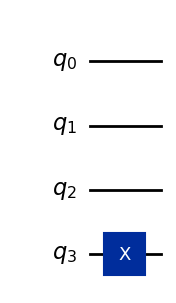

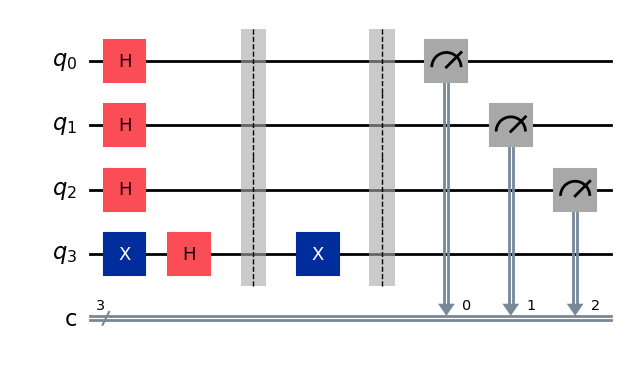

['100', '110', '001', '100', '001', '100', '110', '010', '001', '101', '111', '110', '111', '100', '100', '000', '001', '001', '111', '011', '000', '000', '101', '110', '011', '001', '011', '101', '001', '000', '110', '001', '111', '000', '011', '111', '101', '111', '101', '110', '110', '010', '110', '101', '010', '111', '101', '000', '001', '110', '010', '100', '011', '110', '101', '001', '010', '011', '111', '001', '110', '110', '001', '010', '011', '001', '111', '110', '100', '011', '001', '000', '010', '111', '000', '010', '010', '101', '001', '100', '111', '001', '000', '011', '101', '111', '110', '100', '000', '110', '001', '110', '111', '001', '101', '000', '101', '000', '110', '101', '111', '010', '111', '010', '011', '111', '011', '110', '001', '010', '100', '100', '101', '101', '110', '101', '010', '011', '111', '111', '100', '010', '000', '100', '100', '011', '010', '110', '111', '011', '011', '100', '100', '011', '010', '110', '001', '001', '010', '101', '010', '001', '010'

'Balanced oracle'

In [25]:
f_constant = constant_oracle()

print("Constant oracle:")
display(f_constant.draw("mpl"))
display(dj_algorithm(f_constant))


Balanced oracle:


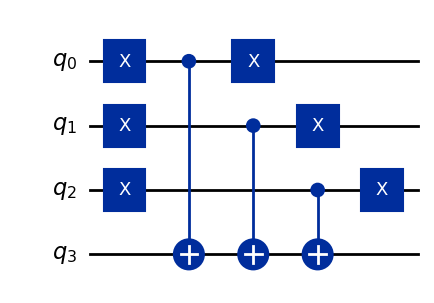

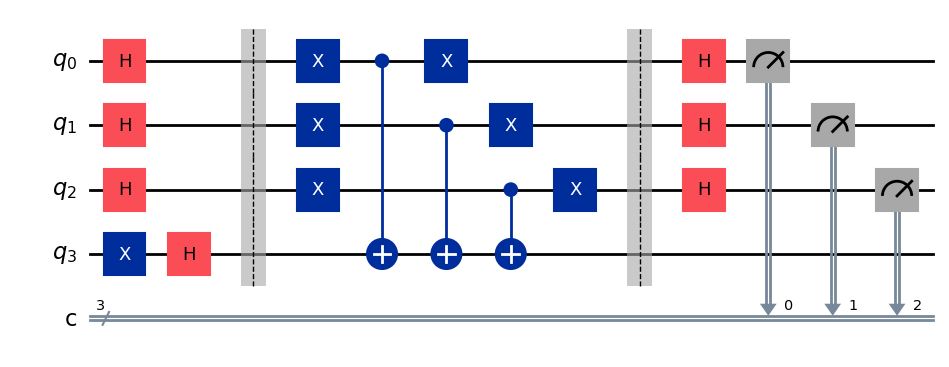

['111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111'

'Balanced oracle'

In [8]:
f_balanced = balanced_oracle()
display(f_balanced.draw("mpl"))
display(dj_algorithm(f_balanced))

In [22]:
def other_balanced_oracle():
    qc = QuantumCircuit(4)
    qc.cx(0, 3)  # CNOT with qubit 0 as control and qubit 3 as target
    return qc


Balanced oracle:


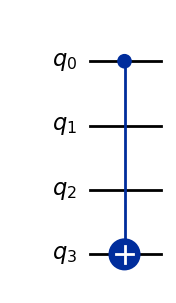

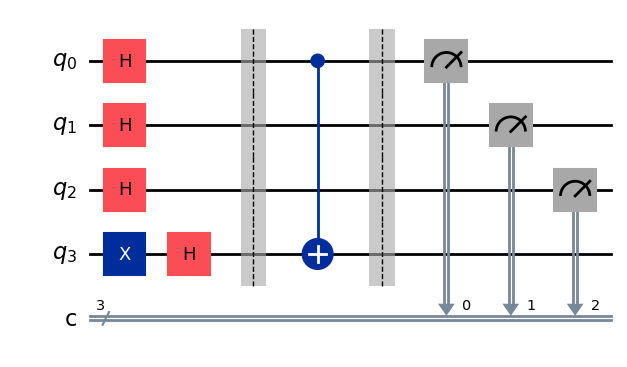

['101', '001', '100', '001', '110', '000', '011', '110', '011', '011', '110', '110', '110', '101', '101', '100', '010', '000', '101', '110', '100', '001', '110', '001', '100', '000', '100', '001', '100', '100', '100', '000', '100', '100', '010', '100', '100', '011', '111', '101', '011', '100', '100', '101', '010', '111', '011', '100', '101', '111', '101', '011', '100', '011', '001', '100', '010', '001', '001', '010', '010', '010', '100', '101', '001', '100', '111', '001', '111', '011', '011', '111', '111', '001', '001', '101', '011', '000', '110', '100', '000', '111', '010', '001', '001', '011', '111', '101', '111', '101', '010', '001', '110', '000', '100', '001', '111', '111', '101', '011', '010', '001', '010', '001', '111', '101', '111', '101', '001', '100', '001', '011', '100', '101', '000', '001', '111', '111', '011', '011', '001', '101', '100', '000', '000', '110', '100', '000', '011', '111', '010', '001', '001', '110', '010', '001', '111', '011', '100', '101', '010', '010', '001'

'Balanced oracle'

In [23]:
f_balanced = other_balanced_oracle()
print("\nBalanced oracle:")
display(f_balanced.draw("mpl"))
display(dj_algorithm(f_balanced))

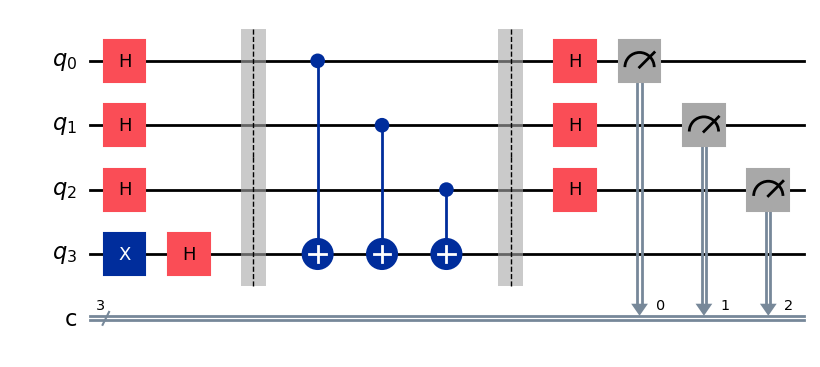

['111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111'

In [11]:
def varied_balanced_oracle():
    qc = QuantumCircuit(4)
    qc.cx(0, 3)  # CNOT con qubit 0 como control y qubit 3 como objetivo
    qc.cx(1, 3)  # CNOT con qubit 1 como control y qubit 3 como objetivo
    qc.cx(2, 3)  # CNOT con qubit 2 como control y qubit 3 como objetivo
    return qc

# Uso del oráculo en el algoritmo de Deutsch-Jozsa
result = dj_algorithm(varied_balanced_oracle())
print(result)

In [19]:
def some_oracle():
    qc = QuantumCircuit(4)
    qc.cx(0, 3)
    qc.x(0)
    qc.cx(0, 3)
    qc.cx(1, 3)
    qc.x(1)
    qc.cx(1, 3)
    qc.cx(2, 3)
    qc.x(2)
    qc.cx(2, 3)

    return qc
    

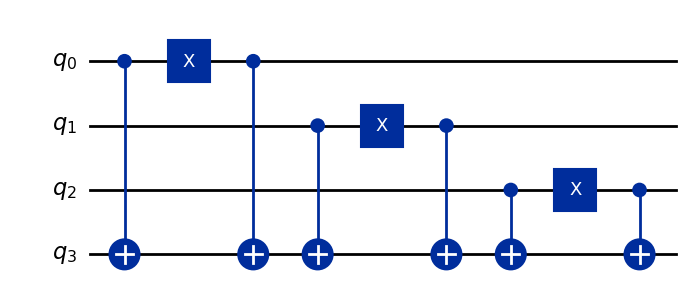

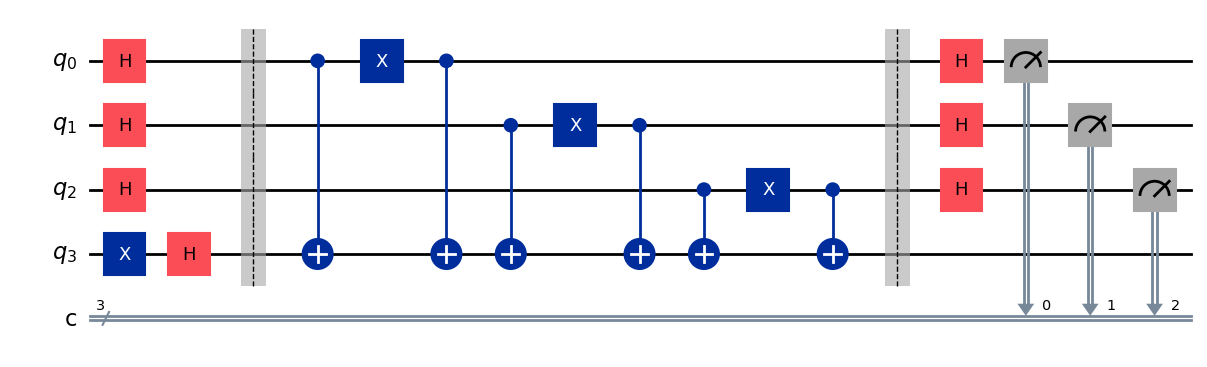

['000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000'

'Constant oracle'

In [20]:
f= some_oracle()
display(f.draw("mpl"))
display(dj_algorithm(f))